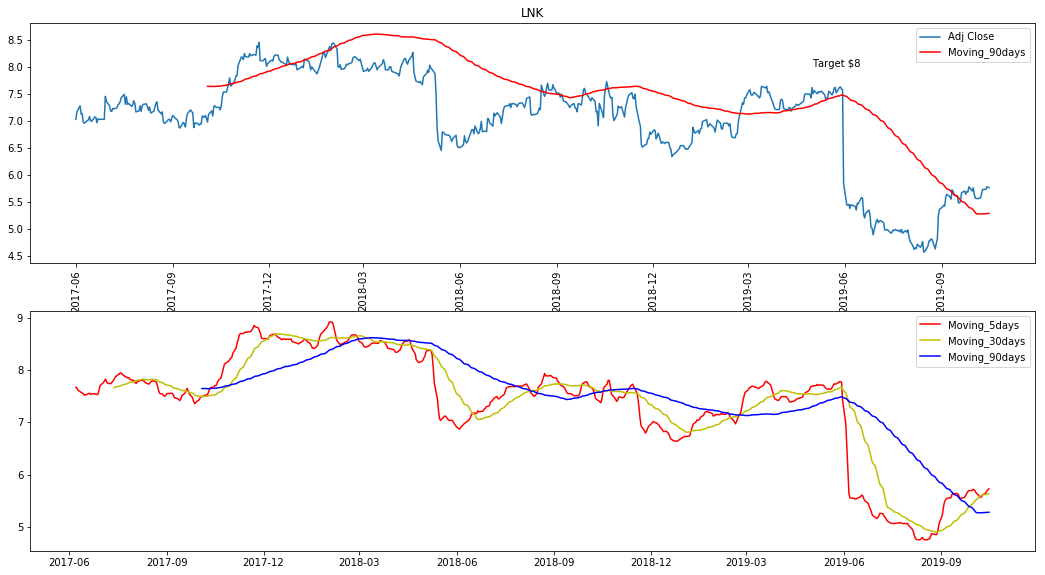

In [328]:
import pandas as pd
import datetime
import math
import numpy as np
import pandas_datareader.data as web
from pandas import Series, DataFrame
from sklearn import preprocessing
import matplotlib.pyplot as plt

start = datetime.datetime(2017, 6, 1)
end = datetime.datetime(2019, 10, 16)

df = web.DataReader("lnk.AX", 'yahoo', start, end)
df['EMA_12'] = df.Close.ewm(span=12).mean()
df['EMA_26'] = df.Close.ewm(span=26).mean()
df['Moving_5days'] = df.Close.rolling(window=5).mean()
df['Moving_30days'] = df.Close.rolling(window=30).mean()
df['Moving_90days'] = df.Close.rolling(window=90).mean()
df['MACD'] = df['EMA_26'] - df['EMA_12']
df['Signal'] = df.MACD.ewm(span=9).mean()
df['Target'] = 8


s = df['Volume']
a = df['Adj Close']

plt.figure(figsize=(18,15))

plt.subplot(3,1,1)
plt.plot(a)
plt.plot(df['Moving_90days'],'R')
#plt.plot(df['Target'],'--')
plt.title('LNK')
plt.xticks(rotation='vertical')
plt.annotate('Target $8',xy=('2019-05-01',8))
plt.legend()

plt.subplot(3,1,2)
plt.plot(df['Moving_5days'],'R')
plt.plot(df['Moving_30days'],'Y')
plt.plot(df['Moving_90days'],'b')
plt.legend()


plt.show()


In [330]:
test = df.loc['2019-09-30':]

In [331]:
def decide(row):
    if row['MACD'] > row['Signal']:
        return 'Execute'
    else:
        return 'Nothing'

In [332]:
test['action'] = test.apply(decide,axis=1)

/Users/ronny/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [333]:
test

,High,Low,Open,Close,Volume,Adj Close,EMA_12,EMA_26,Moving_5days,Moving_30days,Moving_90days,MACD,Signal,Target,action
Date,,,,,,,,,,,,,,,
2019-09-30,5.775,5.640,5.74,5.70,2230112.0,5.70,5.641551,5.506715,5.698,5.426333,5.373000,-0.134836,-0.140453,8,Execute
2019-10-01,5.805,5.640,5.68,5.76,2640572.0,5.76,5.659774,5.525477,5.722,5.455667,5.350333,-0.134297,-0.139222,8,Execute
2019-10-02,5.710,5.635,5.68,5.65,2448713.0,5.65,5.658271,5.534701,5.714,5.481333,5.326333,-0.123569,-0.136091,8,Execute
2019-10-03,5.595,5.470,5.58,5.57,4823977.0,5.57,5.644690,5.537316,5.692,5.503000,5.301889,-0.107375,-0.130348,8,Execute
2019-10-04,5.620,5.540,5.55,5.56,1876565.0,5.56,5.631661,5.538996,5.648,5.524667,5.277444,-0.092665,-0.122811,8,Execute
2019-10-06,5.615,5.550,5.56,5.56,923600.0,5.56,5.620636,5.540552,5.620,5.552333,5.272889,-0.080084,-0.114266,8,Execute
2019-10-07,5.610,5.520,5.56,5.57,1766399.0,5.57,5.612846,5.542733,5.582,5.576667,5.272889,-0.070113,-0.105435,8,Execute
2019-10-08,5.620,5.500,5.52,5.57,2116244.0,5.57,5.606254,5.544753,5.566,5.598667,5.273000,-0.061501,-0.096649,8,Execute
2019-10-09,5.680,5.580,5.58,5.65,1762602.0,5.65,5.612985,5.552549,5.582,5.608000,5.273778,-0.060435,-0.089406,8,Execute


In [303]:
def test(row):
    #s = row['Price'] - row['Vol']
    if row['Price'] > row['Vol']:
        return 'Picked'
    else:
        return "Ignored"

In [304]:
df['result']=df.apply(test,axis=1)

,Price,Vol,Other,result
0,1,1,1000,Ignored
1,2,5,5000,Ignored
2,3,1,1000,Picked
3,4,4,4000,Ignored
4,5,5,5000,Ignored
5,6,6,6000,Ignored


In [287]:
df

,Price,Vol,Other
0,1,1,1000
1,2,5,5000
2,3,1,1000
3,4,4,4000
4,5,5,5000
5,6,6,6000


,Date,Close,Volume,obv
0,2019-09-30,5.70,2230112.0,2230112.0
1,2019-10-01,5.76,2640572.0,2640572.0
2,2019-10-02,5.65,2448713.0,2448713.0
3,2019-10-03,5.57,4823977.0,4823977.0
4,2019-10-04,5.56,1876565.0,1876565.0
5,2019-10-06,5.56,923600.0,923600.0
6,2019-10-07,5.57,1766399.0,1766399.0
7,2019-10-08,5.57,2116244.0,2116244.0
8,2019-10-09,5.65,1762602.0,1762602.0
9,2019-10-10,5.73,1452965.0,1452965.0


In [355]:
h['obv'] = h['Volume']
h = h.reset_index()



/Users/ronny/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [363]:
def jj(data):
    for index, row in data.iterrows():
       
            return data.at[index,'Volume']
       

In [375]:
for index, row in h.iterrows():
       
           if index > 0 :
                before = h.at[index-1,'Volume']
                after = h.at[index,'Volume']
                if after > before :
                    print ('Add')
                else:
                    print ('Dont add')
                
                

Add
Dont add
Add
Dont add
Dont add
Add
Add
Dont add
Dont add
Add
Dont add
Add


In [372]:
h

,Date,Close,Volume,obv
0,2019-09-30,5.70,2230112.0,2230112.0
1,2019-10-01,5.76,2640572.0,2640572.0
2,2019-10-02,5.65,2448713.0,2448713.0
3,2019-10-03,5.57,4823977.0,4823977.0
4,2019-10-04,5.56,1876565.0,1876565.0
5,2019-10-06,5.56,923600.0,923600.0
6,2019-10-07,5.57,1766399.0,1766399.0
7,2019-10-08,5.57,2116244.0,2116244.0
8,2019-10-09,5.65,1762602.0,1762602.0
9,2019-10-10,5.73,1452965.0,1452965.0


In [207]:
s = (1,2,3,4,5,6)
s = np.array(s)

In [226]:
def k(a):
    if a < 5:
        m = 0
    elif a>=5:
        m = 1
    return m

In [227]:
k(s)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [213]:
s = pd.Series([1,2,3,4,9])

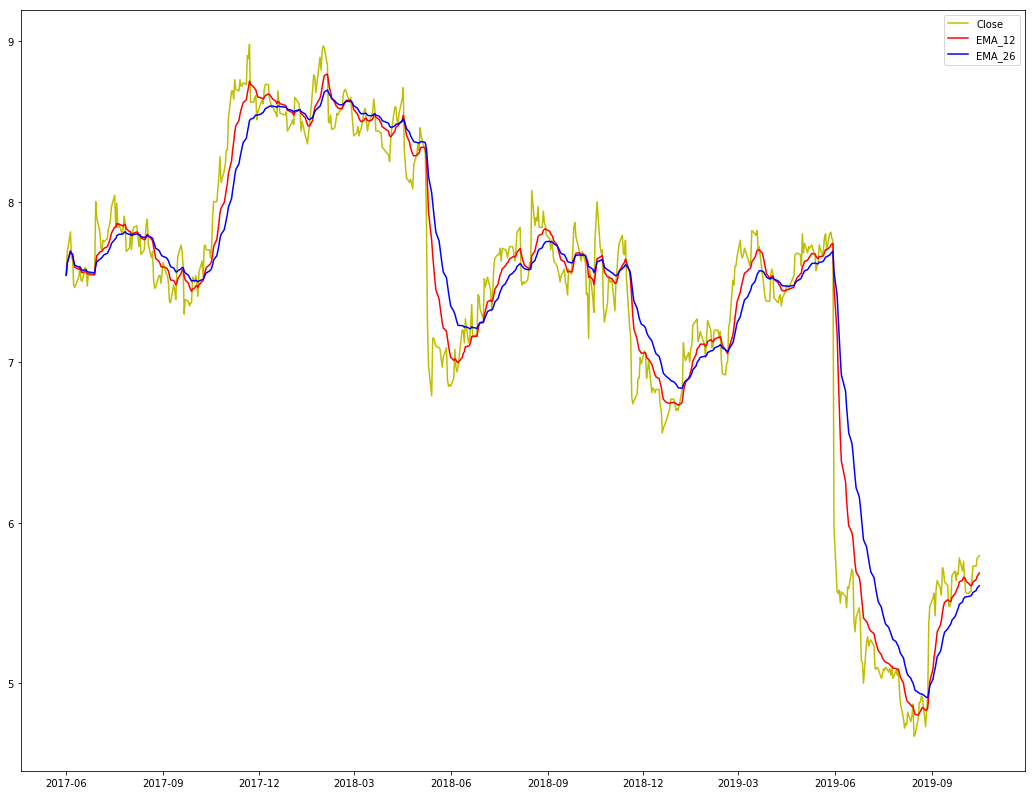

In [114]:

a = df.Close
b = df['EMA_12']
c = df['EMA_26']

plt.figure(figsize=(18,14))
plt.plot(a,'y')
plt.plot(b,'r')
plt.plot(c,'b')

plt.legend()

In [75]:
df['MACD'] = df['EMA_26'] - df['EMA_12']

In [77]:
df['Signal'] = df.MACD.ewm(span=9).mean()

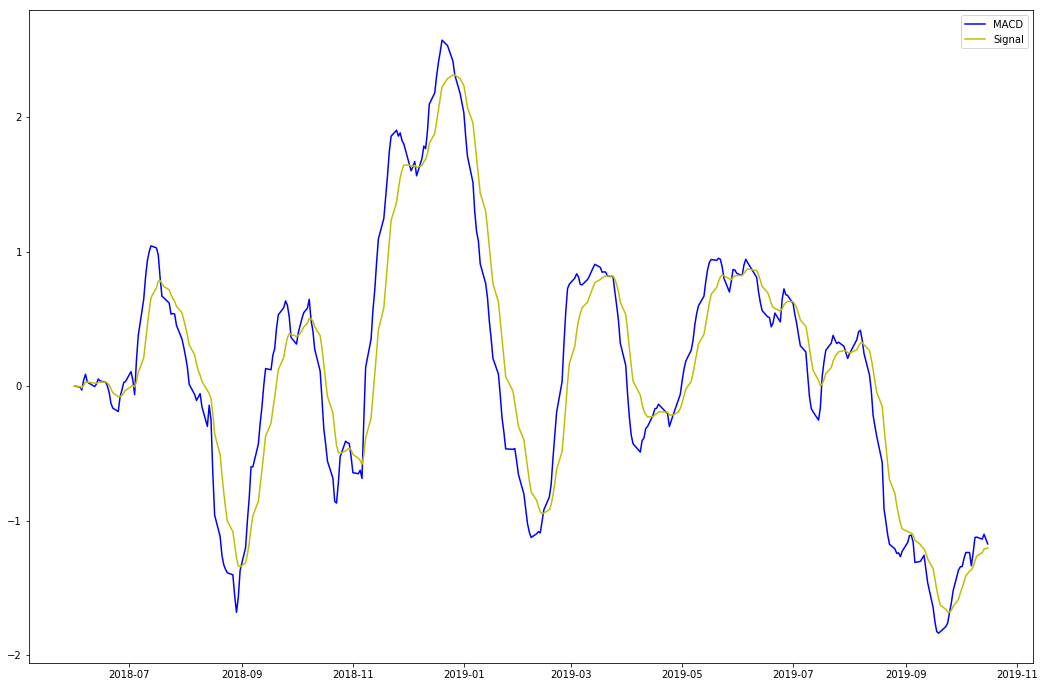

In [82]:
a = df.MACD
b = df.Signal


plt.figure(figsize=(18,12))

plt.plot(a,'b')
plt.plot(b,'y')

plt.legend()

In [75]:
web.DataReader(["DMP.AX","ALG.AX","LNK.AX","PGH.AX","WPL.AX"], 'yahoo', start, end)['Volume']

Symbols,ALG.AX,DMP.AX,LNK.AX,PGH.AX,WPL.AX
Date,,,,,
2019-10-01,685781,273058,2640572,2181287,2820833
2019-10-02,957459,303299,2448713,663816,3137279
2019-10-03,1022093,294250,4823977,1479283,4382148
2019-10-04,936088,244477,1876565,824510,2193803
2019-10-06,229440,135288,923600,593881,2842879
2019-10-07,600130,557275,1766399,685365,1899383
2019-10-08,1265274,631193,2116244,844187,2947015
2019-10-09,1366587,405358,1762602,691439,1859179
2019-10-10,725362,364257,1452965,616826,3588261


In [76]:
close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean()

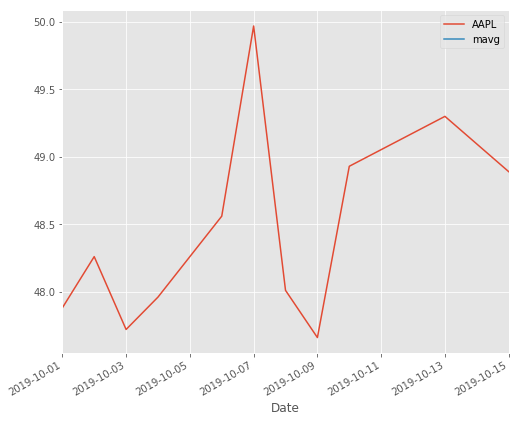

In [77]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='AAPL')
mavg.plot(label='mavg')
plt.legend()

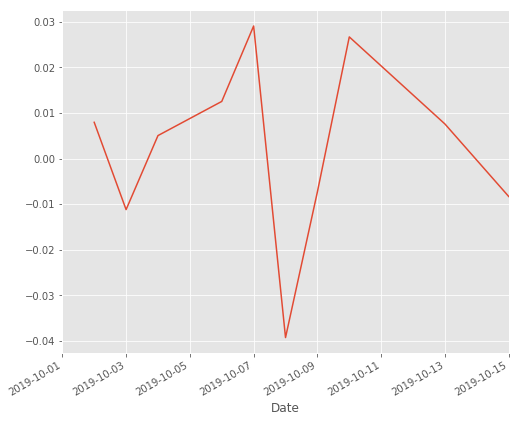

In [78]:
rets = close_px / close_px.shift(1) - 1
rets.plot(label='return')

In [79]:
dfcomp = web.DataReader(['AAPL', 'GE', 'GOOG', 'IBM', 'MSFT'],'yahoo',start=start,end=end)['Adj Close']

In [80]:
retscomp = dfcomp.pct_change()

corr = retscomp.corr()

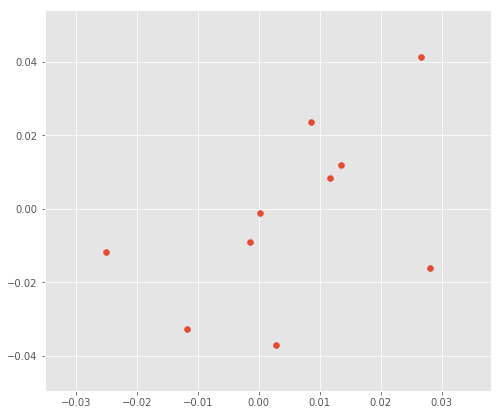

In [81]:
plt.scatter(retscomp.AAPL, retscomp.GE)


In [82]:
retscomp.GE

Date
2019-09-30         NaN
2019-10-01   -0.036913
2019-10-02   -0.011614
2019-10-03    0.023502
2019-10-04   -0.016074
2019-10-07   -0.001167
2019-10-08   -0.032710
2019-10-09    0.008454
2019-10-10    0.011976
2019-10-11    0.041420
2019-10-14   -0.009091
Name: GE, dtype: float64

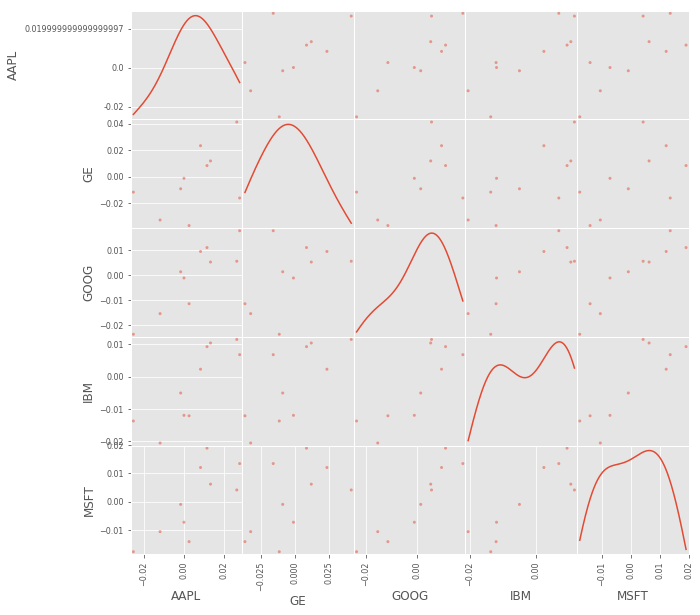

In [83]:
pd.plotting.scatter_matrix(retscomp, diagonal='kde', figsize=(10, 10));

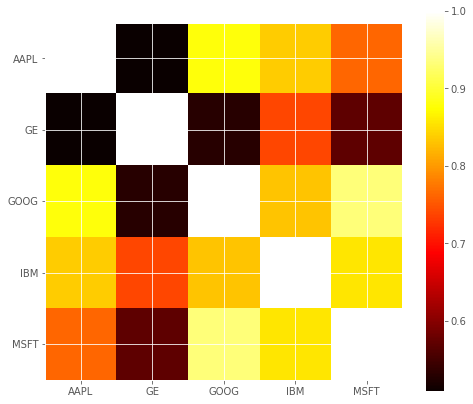

In [84]:
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);

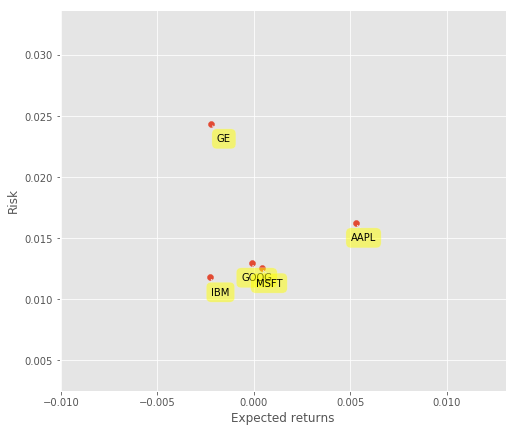

In [85]:
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

In [86]:
dfreg = df.loc[:,['Adj Close','Volume']]
dfreg["HL_PCT"] = (df["High"] - df["Low"]) / df["Close"] * 100.0
dfreg["PCT_change"] = (df["Close"] - df["Open"]) / df["Open"] * 100.0

In [90]:
from sklearn import preprocessing

# Drop missing value
dfreg.fillna(value=-99999, inplace=True)# We want to separate 1 percent of the data to forecast
forecast_out = int(math.ceil(0.01 * len(dfreg)))# Separating the label here, we want to predict the AdjClose
forecast_col = 'Adj Close'
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)
X = np.array(dfreg.drop(['label'], 1))# Scale the X so that everyone can have the same distribution for linear regression
X = preprocessing.scale(X)# Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
X_lately = X[-forecast_out:]
X = X[:-forecast_out]# Separate label and identify it as y
y = np.array(dfreg['label'])
y = y[:-forecast_out]

In [91]:
# Drop missing value
dfreg.fillna(value=-99999, inplace=True)# We want to separate 1 percent of the data to forecast
forecast_out = int(math.ceil(0.01 * len(dfreg)))# Separating the label here, we want to predict the AdjClose
forecast_col = 'Adj Close'
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)
X = np.array(dfreg.drop(['label'], 1))# Scale the X so that everyone can have the same distribution for linear regression
X = preprocessing.scale(X)# Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
X_lately = X[-forecast_out:]
X = X[:-forecast_out]# Separate label and identify it as y
y = np.array(dfreg['label'])
y = y[:-forecast_out]

In [93]:
dfreg.head()

,Adj Close,Volume,HL_PCT,PCT_change,label
Date,,,,,
2019-10-01,47.880001,273058,3.111942,2.702707,48.259998
2019-10-02,48.259998,303299,2.279325,0.962341,47.720001
2019-10-03,47.720001,294250,1.927917,0.378629,47.959999
2019-10-04,47.959999,244477,1.959964,0.334728,48.560001
2019-10-06,48.560001,135288,1.832783,1.166670,49.970001
